In [1]:
import os
import pandas as pd
import numpy as np

import pylab as plt
import statistics
import scipy.stats

In [2]:
task='Jing'
data_year = "2020"
cell_name='GI1'

data_dir = os.path.join("/Users/lidiayung/PhD_project/project_GBM/gbm_DATA/gbm_DATA_LINCs_GI1")

out_dir = "00_plots_" + data_year + "_" + cell_name + "_" 
#os.makedirs(out_dir, exist_ok = True)

## Data_norm

In [3]:
data_file = os.path.join(data_dir, "Data_norm_" + data_year + "_" + cell_name+ ".xlsx")
Data_norm=pd.read_excel(data_file,index_col=0)
display(Data_norm)

genes_list = Data_norm.columns.to_list()
print("Landmark genes in LINCS data:", len(genes_list), genes_list)

exp_id_list = Data_norm.index.to_list()
print("Experiments in LINCS data for " + cell_name + " cells:", len(exp_id_list), exp_id_list)

,AARS,ABCB6,ABCC5,ABCF1,ABCF3,ABHD4,ABHD6,ABL1,ACAA1,ACAT2,...,ZMIZ1,ZMYM2,ZNF131,ZNF274,ZNF318,ZNF395,ZNF451,ZNF586,ZNF589,ZW10
ASG002_GI1_24H:A03,0.014285,0.302692,0.124004,0.005246,0.340042,0.276465,0.127250,0.328650,0.627212,-0.220684,...,-0.102669,0.893785,0.505962,-0.357469,0.517504,0.255096,0.008023,-0.144581,-0.187158,-0.225612
ASG002_GI1_24H:A04,0.084985,0.276642,0.324054,-0.016954,0.079942,0.155465,-0.100200,0.345250,0.183511,-0.080484,...,-0.057569,-0.443416,0.094212,-0.303270,0.271754,-0.176304,-0.028377,0.017819,-0.187858,-0.157212
ASG002_GI1_24H:A05,-0.019615,0.183842,0.282254,-0.577354,0.316943,0.109765,0.117800,0.301150,-0.187188,0.275415,...,0.082731,-0.124365,0.141711,-0.221269,0.206753,0.215946,0.000723,0.130619,-0.080258,0.012289
ASG002_GI1_24H:A06,0.324884,0.146642,0.192004,0.043446,0.141842,-0.053335,-0.028000,-0.580550,0.622812,-0.080985,...,0.246530,0.644485,0.082212,-0.069869,0.142254,0.576146,0.092923,-0.041681,-0.253158,-0.221112
ASG002_GI1_24H:J13,0.182484,0.060892,-0.044696,-0.346554,-0.158858,-0.031434,0.068500,0.372950,-0.366439,-0.176334,...,-0.204769,-0.254016,0.310211,-0.177470,-0.026896,0.068946,0.070023,-0.011181,-0.366158,0.121888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_GI1_24H:P20,0.844125,0.359950,0.014575,0.002151,0.108225,-0.232287,0.331775,0.190337,-0.644337,-0.320262,...,-0.223550,0.344850,-0.421962,-0.379925,0.154400,0.031300,-0.095100,-0.317588,0.103650,1.095600
MOAR012_GI1_24H:P21,0.346174,0.102800,-0.449275,-0.206150,0.500625,-0.383837,0.456875,0.125388,-0.490437,-0.240913,...,-0.271100,-0.497100,-0.194638,-0.082924,-0.450300,-0.088776,0.427825,-0.431062,-0.064025,1.196051
MOAR012_GI1_24H:P22,0.195774,0.285975,-0.675725,-0.243999,0.197526,0.238638,-0.013250,-0.236763,-0.761688,-0.048863,...,-0.190250,-0.331850,-0.556237,-0.161175,-0.274225,0.178549,0.110350,0.389612,0.043350,1.345251
MOAR012_GI1_24H:P23,0.093424,0.179075,-0.400900,-0.337299,0.084625,-0.015337,-0.073375,-0.276812,0.107612,0.054488,...,0.203775,-0.216850,-1.163637,-0.258825,-0.483600,0.067650,0.465775,0.345462,1.912200,1.386475


Landmark genes in LINCS data: 978 ['AARS', 'ABCB6', 'ABCC5', 'ABCF1', 'ABCF3', 'ABHD4', 'ABHD6', 'ABL1', 'ACAA1', 'ACAT2', 'ACBD3', 'ACD', 'ACLY', 'ACOT9', 'ADAM10', 'ADAT1', 'ADGRE5', 'ADGRG1', 'ADH5', 'ADI1', 'ADO', 'ADRB2', 'AGL', 'AKAP8', 'AKAP8L', 'AKR7A2', 'AKT1', 'ALAS1', 'ALDH7A1', 'ALDOA', 'ALDOC', 'AMDHD2', 'ANKRD10', 'ANO10', 'ANXA7', 'APBB2', 'APOE', 'APP', 'APPBP2', 'ARFIP2', 'ARHGAP1', 'ARHGEF12', 'ARHGEF2', 'ARID4B', 'ARID5B', 'ARL4C', 'ARNT2', 'ARPP19', 'ASAH1', 'ASCC3', 'ATF1', 'ATF5', 'ATF6', 'ATG3', 'ATMIN', 'ATP11B', 'ATP1B1', 'ATP2C1', 'ATP6V0B', 'ATP6V1D', 'AURKA', 'AURKB', 'AXIN1', 'B4GAT1', 'BACE2', 'BAD', 'BAG3', 'BAMBI', 'BAX', 'BCL2', 'BCL7B', 'BDH1', 'BECN1', 'BHLHE40', 'BID', 'BIRC2', 'BIRC5', 'BLCAP', 'BLMH', 'BLVRA', 'BMP4', 'BNIP3', 'BNIP3L', 'BPHL', 'BRCA1', 'BTK', 'BUB1B', 'BZW2', 'C2CD2', 'C2CD2L', 'C2CD5', 'C5', 'CAB39', 'CALM3', 'CALU', 'CAMSAP2', 'CANT1', 'CAPN1', 'CARMIL1', 'CASC3', 'CASK', 'CASP10', 'CASP2', 'CASP3', 'CASP7', 'CAST', 'CAT', 'CBLB

## Sig_info

In [4]:
data_file = os.path.join(data_dir, "sig_info_" + data_year + "_" + cell_name+ ".xlsx")
sig_info_cell_df = pd.read_excel(data_file, index_col = 0).fillna("")
display(sig_info_cell_df)

,cell,plate,time,level_3_samples,samples_number,pert_type,pert_drug,targets,targets_number,dose,dose_float
level_5_sig_id,,,,,,,,,,,
ASG002_GI1_24H:A03,GI1,ASG002,24 h,ASG002_GI1_24H_X1_B35:A03,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_GI1_24H:A04,GI1,ASG002,24 h,ASG002_GI1_24H_X1_B35:A04,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_GI1_24H:A05,GI1,ASG002,24 h,ASG002_GI1_24H_X1_B35:A05,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_GI1_24H:A06,GI1,ASG002,24 h,ASG002_GI1_24H_X1_B35:A06,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
ASG002_GI1_24H:J13,GI1,ASG002,24 h,ASG002_GI1_24H_X1_B35:J13,1,ctl_vehicle,DMSO,DMSO_No_target,0,0 uM,0.00
...,...,...,...,...,...,...,...,...,...,...,...
MOAR012_GI1_24H:P20,GI1,MOAR012,24 h,MOAR012_GI1_24H_X1_B36:P20,1,trt_cp,BAY-61-3606,,0,3.33 uM,3.33
MOAR012_GI1_24H:P21,GI1,MOAR012,24 h,MOAR012_GI1_24H_X1_B36:P21,1,trt_cp,BAY-61-3606,,0,1.11 uM,1.11
MOAR012_GI1_24H:P22,GI1,MOAR012,24 h,MOAR012_GI1_24H_X1_B36:P22,1,trt_cp,ethaverine,,0,10 uM,10.00


## Input_info - ALL_DATA (modules, STV)

In [5]:
data_file = "/Users/lidiayung/PhD_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_LINCS/ALL_DATA_2020_Jing.xlsx"
modules = pd.read_excel(data_file, sheet_name = "modules", index_col = 0)
display(modules)

""
Module
CDK1
CDK2
PAK
PI3K
ERK
BET
Aurora
TGFbR
VEGFR


## STV (State Transition Vectors)

In [6]:
data_file = "/Users/lidiayung/PhD_project/project_GBM/gbm_OUTPUT/gbm_OUTPUT_LINCS/ALL_DATA_2020_Jing_gbm.xlsx" 

STVs_df = pd.read_excel(data_file,sheet_name='STVs',index_col = 0)
STVs= pd.read_excel(data_file,sheet_name='STVs',index_col = 0)
display(STVs_df)

states = STVs.columns.to_list()
print("States:", states)

,GBM_onc,GBM_survival
Gene,,
AARS,-0.018282,0.000000
ABCF1,-0.011879,-2.215623
ABL1,0.001878,0.436299
ACAA1,0.005391,0.000000
ACAT2,-0.022549,0.000000
...,...,...
TXLNA,-0.006227,0.000000
SPRED2,-0.030307,0.000000
EML3,0.060709,0.000000


States: ['GBM_onc', 'GBM_survival']


## DPD calculating

In [7]:
DPD_df = pd.DataFrame(
    np.zeros((len(exp_id_list), len(states))),
    index = exp_id_list,
    columns = states,
)

for exp_id in DPD_df.index:
    for state in states:
        DPD_df.loc[exp_id, state] = np.dot(Data_norm.loc[exp_id], STVs_df.loc[:, state])

display(DPD_df)

,GBM_onc,GBM_survival
ASG002_GI1_24H:A03,0.453232,0.137788
ASG002_GI1_24H:A04,0.444041,2.396572
ASG002_GI1_24H:A05,0.109216,-1.568369
ASG002_GI1_24H:A06,0.259278,1.833880
ASG002_GI1_24H:J13,-0.599437,0.782802
...,...,...
MOAR012_GI1_24H:P20,0.831339,-0.319421
MOAR012_GI1_24H:P21,0.242246,-1.622641
MOAR012_GI1_24H:P22,0.436844,-0.836280
MOAR012_GI1_24H:P23,-0.685342,-11.591286


In [8]:
DPD_inf_df = pd.concat([
                            DPD_df,
                            sig_info_cell_df.loc[DPD_df.index, ["pert_drug", "targets", "dose"]]
                            ], axis = 1)

display(DPD_inf_df)

,GBM_onc,GBM_survival,pert_drug,targets,dose
ASG002_GI1_24H:A03,0.453232,0.137788,DMSO,DMSO_No_target,0 uM
ASG002_GI1_24H:A04,0.444041,2.396572,DMSO,DMSO_No_target,0 uM
ASG002_GI1_24H:A05,0.109216,-1.568369,DMSO,DMSO_No_target,0 uM
ASG002_GI1_24H:A06,0.259278,1.833880,DMSO,DMSO_No_target,0 uM
ASG002_GI1_24H:J13,-0.599437,0.782802,DMSO,DMSO_No_target,0 uM
...,...,...,...,...,...
MOAR012_GI1_24H:P20,0.831339,-0.319421,BAY-61-3606,,3.33 uM
MOAR012_GI1_24H:P21,0.242246,-1.622641,BAY-61-3606,,1.11 uM
MOAR012_GI1_24H:P22,0.436844,-0.836280,ethaverine,,10 uM
MOAR012_GI1_24H:P23,-0.685342,-11.591286,ethaverine,,3.33 uM


In [9]:
#DPD_inf_df.to_excel(os.path.join(out_dir, "DPD_full" + data_year + "_" + cell_name + "_" + task + ".xlsx"))
#DPD_inf_df.to_csv(os.path.join(out_dir, "DPD_full" + data_year + "_" + cell_name + "_" + task + ".csv"))

# Read DPDs

In [10]:
#DPD_inf_df = pd.read_excel("/Users/lidiayung/project/resource/perturbations/00_plots_2020_CAL29_/DPD_full2020_CAL29_Jing.xlsx",index_col=0)

In [11]:
#DPD_inf_df

In [12]:
import seaborn as sns

<Axes: xlabel='GBM_onc', ylabel='Count'>

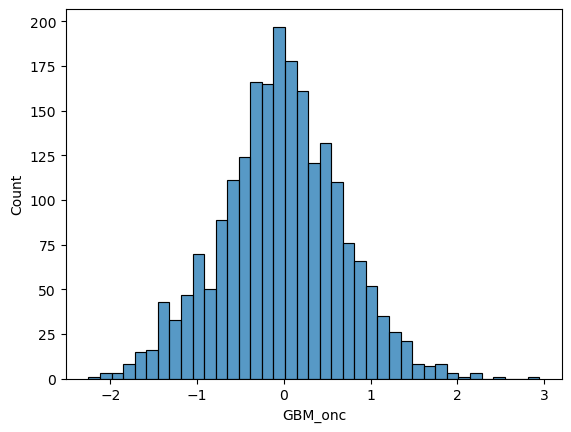

In [13]:
sns.histplot(DPD_inf_df['GBM_onc'])

<Axes: xlabel='GBM_survival', ylabel='Count'>

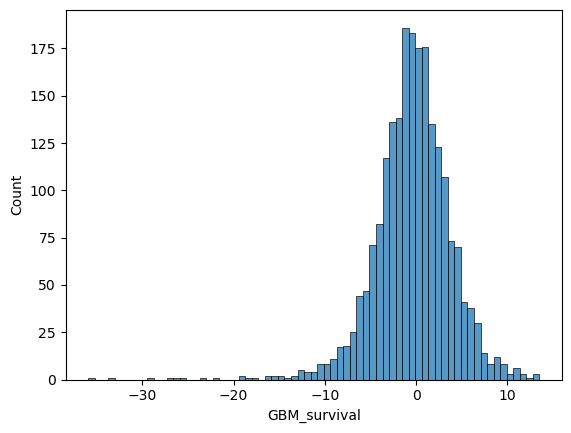

In [14]:
sns.histplot(DPD_inf_df['GBM_survival'])

## Analisys of DPD values to find targets

In [15]:
i = 0
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,GBM_onc,GBM_survival,pert_drug,targets,dose
MOAR008_GI1_24H:J09,-2.252035,-0.003141,glibenclamide,"ABCC8, CFTR, KCNJ11, KCNJ5, KCNJ8",1.11 uM
MOAR008_GI1_24H:F15,-2.112683,-12.210285,tetrabenazine,SLC18A2,1.11 uM
MOAR008_GI1_24H:D16,-2.070615,-1.689570,salicylic-acid,PTGS1,10 uM
MOAR008_GI1_24H:M22,-2.055287,-2.703822,tiagabine,SLC6A1,10 uM
MOAR008_GI1_24H:F22,-1.953915,9.019193,L-670596,,10 uM
MOAR008_GI1_24H:J19,-1.911868,-5.626226,GW-842166,,10 uM
MOAR008_GI1_24H:G19,-1.858665,1.056589,BRD-K58930050,,10 uM
MOAR008_GI1_24H:H20,-1.797554,-1.317695,stemregenin-1,AHR,3.33 uM
MOAR011_GI1_24H:C15,-1.784690,-4.214571,laropiprant,PTGDR,1.11 uM
MOAR008_GI1_24H:E11,-1.772179,3.156598,BRD-K84214706,,3.33 uM


Targets: 13 ['', 'ABCC8, CFTR, KCNJ11, KCNJ5, KCNJ8', 'AHR', 'AXL', 'BIRC5', 'CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9, EGFR, PYGM', 'HDAC1, HDAC2', 'MET', 'PTGDR', 'PTGS1', 'SLC18A2', 'SLC6A1', 'TOP1']


In [16]:
i = 1
top = 10

DPD_analysis = pd.concat([
                            DPD_inf_df.sort_values(by = states[i])[:top],
                            DPD_inf_df.sort_values(by = states[i])[len(DPD_df.index) - top:]
                            ], axis = 0)

display(DPD_analysis)

print("Targets:", len(set(DPD_analysis.targets)), sorted(set(DPD_analysis.targets)))

,GBM_onc,GBM_survival,pert_drug,targets,dose
ASG002_GI1_24H:L01,1.158953,-35.916286,PHA-793887,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9",10 uM
MOAR011_GI1_24H:N01,1.745722,-33.360997,PF-562271,"PTK2, PTK2B",10 uM
ASG002_GI1_24H:I04,1.404115,-28.908749,daunorubicin,TOP2A,10 uM
MOAR012_GI1_24H:B09,-0.327018,-27.120194,TP-0903,,1.11 uM
ASG002_GI1_24H:F04,1.998594,-25.964733,alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...",10 uM
ASG002_GI1_24H:D10,2.946493,-25.881210,panobinostat,"HDAC1, HDAC2",10 uM
ASG002_GI1_24H:H22,1.936100,-23.072416,YM-155,BIRC5,10 uM
MOAR011_GI1_24H:D13,-0.894414,-21.861839,guanadrel,SLC6A2,10 uM
MOAR010_GI1_24H:D24,0.150768,-19.375797,NMDA,"GRIN1, GRIN2A, GRIN2B",1.11 uM
MOAR012_GI1_24H:J08,-0.029797,-19.108709,osthol,,3.33 uM


Targets: 15 ['', 'AOC3, MAOA, MAOB', 'BIRC5', 'CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9, EGFR, PYGM', 'CDK1, CDK2, CDK4, CDK5, CDK7, CDK9', 'CXCR1, CXCR2', 'CXCR2', 'FLT3, KDR, KIT, MET, RET, TEK', 'FNTA, NFKB1', 'GRIN1, GRIN2A, GRIN2B', 'HDAC1, HDAC2', 'PTK2', 'PTK2, PTK2B', 'SLC6A2', 'TOP2A']


In [17]:
### copy manually
targets_list = ["ATP4A", "AVPR1A", "CYSLTR1", "CYSLTR2", "ESR1", "ESR2", "FKBP1A", "MTOR", "IDH1", "MAOA", "NFE2L2", "OPRD1", "OPRK1", "OPRM1", "PSMB1", "PSMB1", "PSMB2", "PSMB5", "PTGS1", "PTGS2", "ADRB2", "DRD1", "DRD2", "HRH1", "HTR1A", "HTR1B", "HTR2A", "AURKA", "AURKB", "FGFR1", "FGFR2", "KDR", "PDGFRA", "PDGFRB", "CYP2C19", "CYP2C9", "CYP3A4", "CYP3A5", "PTGS1", "DHODH", "ESR1", "GNRHR", "FKBP1A", "MTOR", "HDAC1", "HDAC2", "HDAC3", "HDAC6", "HDAC8", "MET", "MMUT", "PDE4D", "PSMB1", "PSMB2", "PSMB5", "PTGS1", "PTGS2", "SLC6A2", "AOC1", "ATP4A", "CDK2", "CDK7", "CDK9", "CHRM1", "DRD2", "HTR2A", "FFAR1", "PDE11A", "PDE5A", "PPARG", "PSMB1", "PSMB1", "PSMB2", "PSMB5"]
targets_list = sorted(list(set(targets_list )))
print("Targets:", len(targets_list ), targets_list) 

Targets: 57 ['ADRB2', 'AOC1', 'ATP4A', 'AURKA', 'AURKB', 'AVPR1A', 'CDK2', 'CDK7', 'CDK9', 'CHRM1', 'CYP2C19', 'CYP2C9', 'CYP3A4', 'CYP3A5', 'CYSLTR1', 'CYSLTR2', 'DHODH', 'DRD1', 'DRD2', 'ESR1', 'ESR2', 'FFAR1', 'FGFR1', 'FGFR2', 'FKBP1A', 'GNRHR', 'HDAC1', 'HDAC2', 'HDAC3', 'HDAC6', 'HDAC8', 'HRH1', 'HTR1A', 'HTR1B', 'HTR2A', 'IDH1', 'KDR', 'MAOA', 'MET', 'MMUT', 'MTOR', 'NFE2L2', 'OPRD1', 'OPRK1', 'OPRM1', 'PDE11A', 'PDE4D', 'PDE5A', 'PDGFRA', 'PDGFRB', 'PPARG', 'PSMB1', 'PSMB2', 'PSMB5', 'PTGS1', 'PTGS2', 'SLC6A2']


## Plots for targets

In [18]:
print_drugs = []

### CDK1/2

In [117]:
target = "CDK4"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "CDK6"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target CDK6: 3 ['PHA-793887', 'alvocidib', 'palbociclib']


In [20]:
drugs_list = drugs #+ ["OTS-167", "PHA-767491"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
JNJ-7706621,"AURKA, AURKB, CDK1, CDK2","0.12 uM, 1.11 uM, 10 uM"
PHA-793887,"CDK1, CDK2, CDK4, CDK5, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.12 uM, 1.11 uM, 10 uM"
roscovitine,"CDK2, CDK7, CDK9","0.12 uM, 1.11 uM, 10 uM"


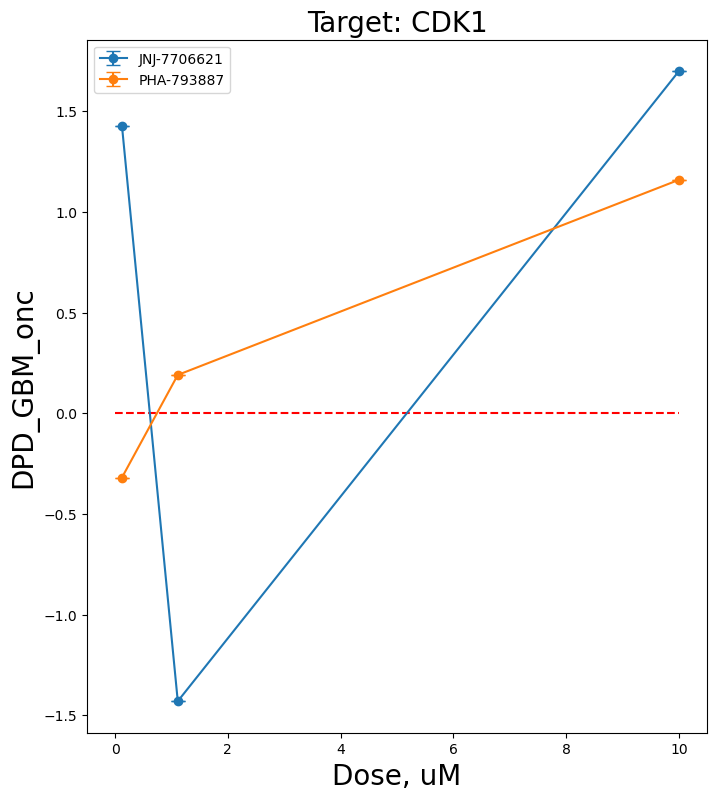

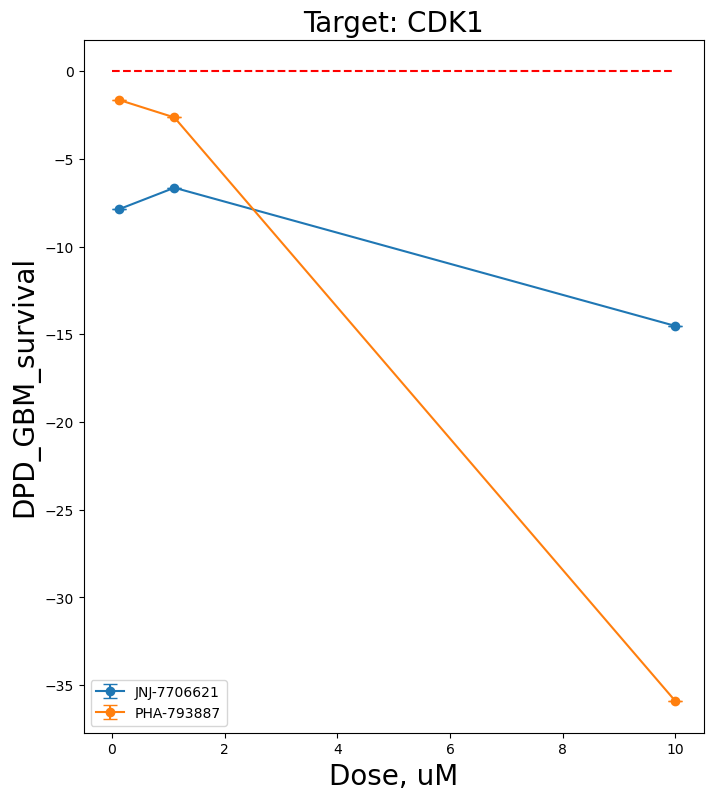

In [81]:
target_name = "CDK1"
target_drugs=drugs
target_drugs = ['JNJ-7706621','PHA-793887']
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (8,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

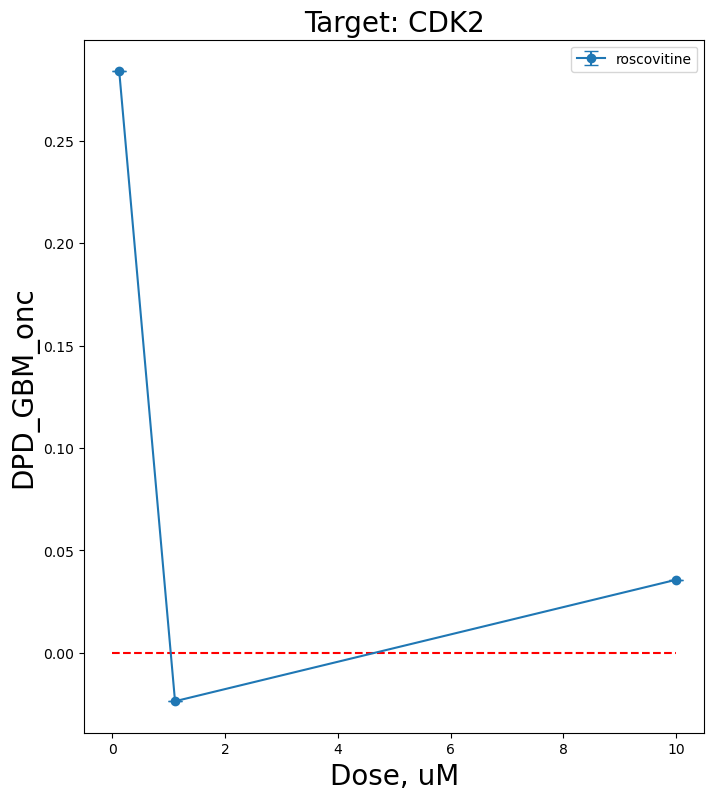

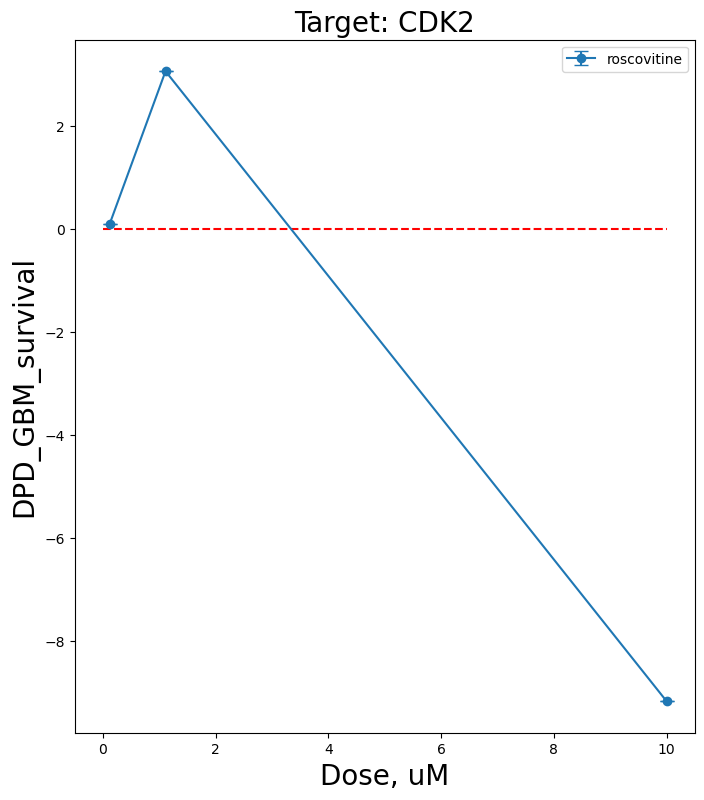

In [82]:
target_name = "CDK2"
target_drugs=drugs
target_drugs = ['roscovitine']
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (8,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

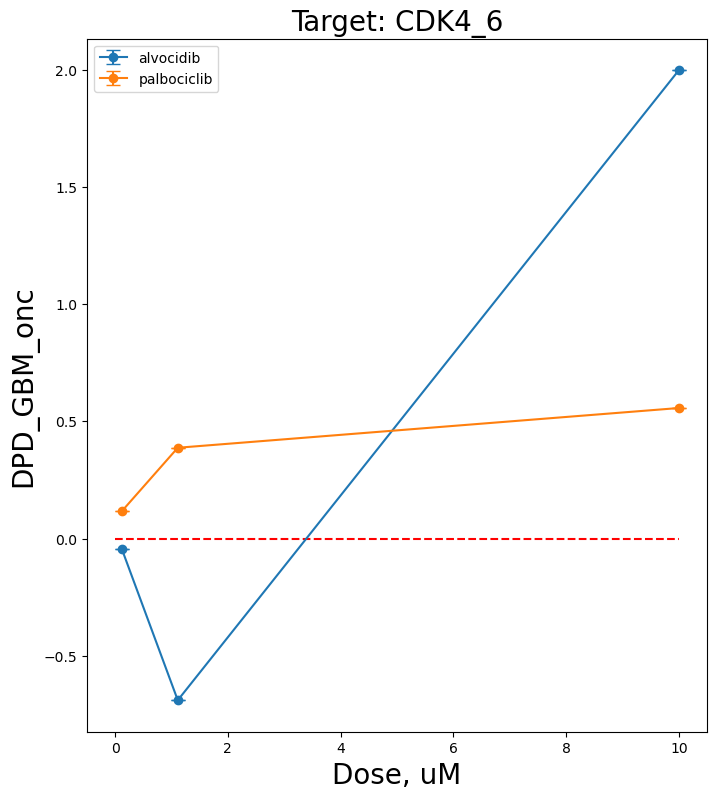

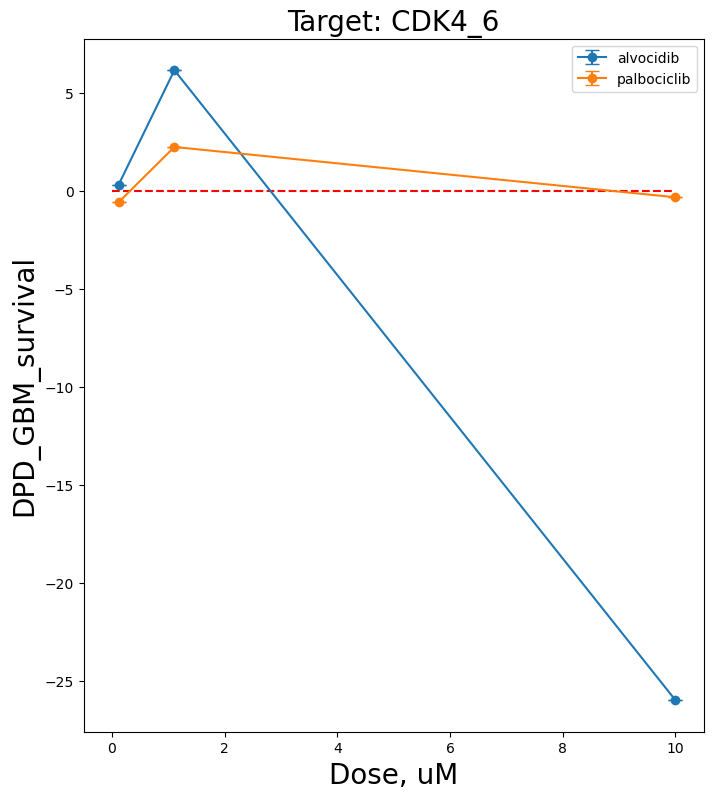

In [83]:
target_name = "CDK4_6"
target_drugs=drugs
target_drugs = ['alvocidib','palbociclib']
# deleted PHA-848125, alvocidib because other targets = CDK4, CDK6 (other phase of cell cycle)

for DPD_val in states:
    plt.figure(figsize = (8,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### PI3K

In [59]:
target = "PIK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PIK: 6 ['AS-605240', 'GDC-0349', 'LY-294002', 'NVP-BEZ235', 'PI-103', 'taselisib']


In [60]:
drugs_list = drugs
#['testosterone-enanthate', 'testosterone-propionate','oxandrolone','nandrolone']

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AS-605240,PIK3CG,"0.12 uM, 1.11 uM, 10 uM"
GDC-0349,PIK3CA,"1.11 uM, 10 uM, 3.33 uM"
LY-294002,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG, PLK1, PRKDC","0.12 uM, 1.11 uM, 10 uM"
NVP-BEZ235,"MTOR, PIK3CA, PIK3CD, PIK3CG","1.11 uM, 10 uM"
PI-103,"MTOR, PIK3CA, PIK3CB, PIK3CD, PIK3CG","0.12 uM, 1.11 uM, 10 uM"
taselisib,PIK3CA,"0.12 uM, 1.11 uM, 10 uM"


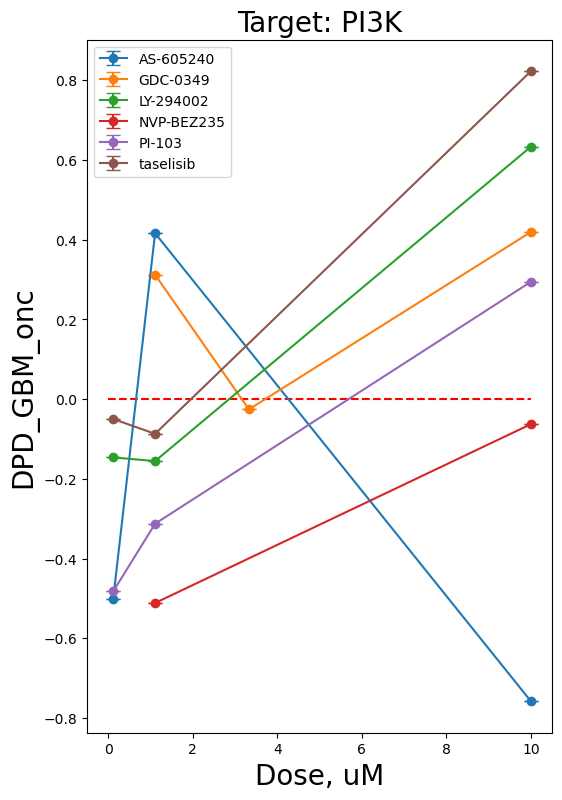

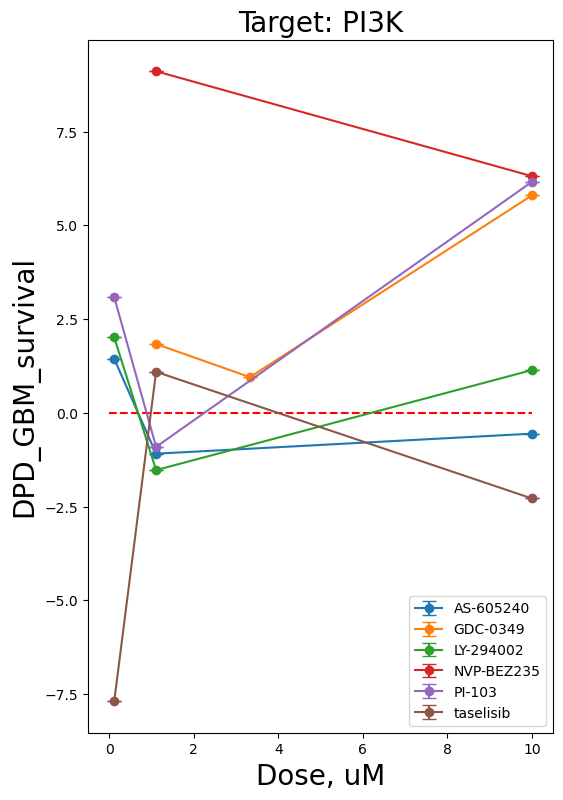

In [61]:
target_name = "PI3K"
target_drugs=drugs_list
#target_drugs = ["PF-04691502", "XL-147", "GSK-2334470", "A-66", "BGT-226", "BX-795"]
# deleted idelalisib, quercetin because other targets = PIK3CD, PIK3CG (delta, gamma, we use only alpha)


for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
print_drugs += target_drugs

### Hypoxia

In [62]:
target = "HIF"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target HIF: 2 ['BAY-87-2243', 'CAY-10585']


In [63]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
BAY-87-2243,HIF1A,"1.11 uM, 10 uM, 3.33 uM"
CAY-10585,HIF1A,"1.11 uM, 10 uM, 3.33 uM"


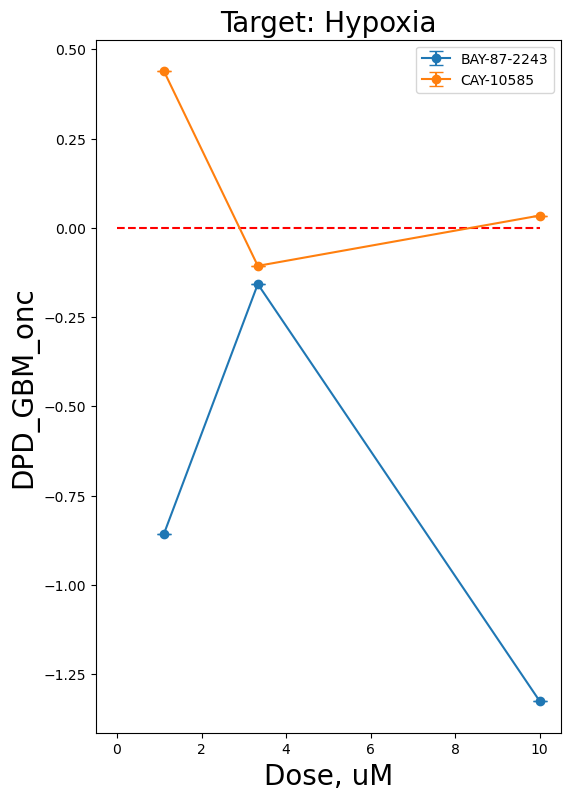

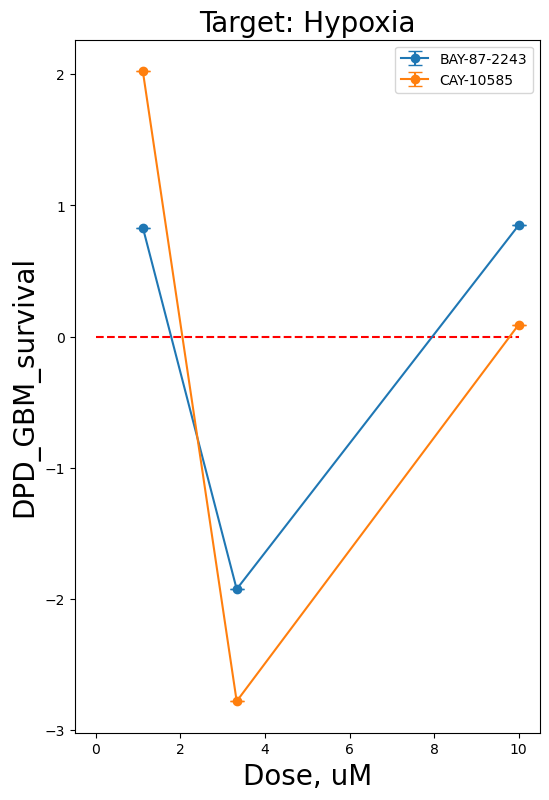

In [64]:
target_name = "Hypoxia"
target_drugs=drugs_list
# deleted idelalisib, quercetin because other targets = PIK3CD, PIK3CG (delta, gamma, we use only alpha)


for DPD_val in states:
    plt.figure(figsize = (6,9))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "red")
    plt.xlabel("Dose, uM",fontsize=20)
    plt.ylabel("DPD_" + DPD_val,fontsize=20)
    plt.title("Target: " + target_name,fontsize=20)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### ERK

In [30]:
target_name = "ERK"

target = "MAP2K"
drugs = list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "MAPK"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

target = "RAF"
drugs += list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug))

drugs = sorted(list(set(drugs)))

print("drugs for target " + target_name + ":" , len(drugs), drugs)

drugs for target ERK: 7 ['AZ-628', 'PD-0325901', 'dabrafenib', 'selumetinib', 'sorafenib', 'trametinib', 'vemurafenib']


In [31]:
drugs_list = drugs + ["RAF-265"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AZ-628,"BRAF, RAF1","0.12 uM, 1.11 uM, 10 uM"
PD-0325901,MAP2K1,"0.12 uM, 1.11 uM, 10 uM"
dabrafenib,BRAF,"0.12 uM, 1.11 uM, 10 uM"
selumetinib,MAP2K1,"0.12 uM, 1.11 uM, 10 uM"
sorafenib,"BRAF, DDR2, FGFR1, FLT1, FLT3, FLT4, KDR, KIT,...","0.12 uM, 1.11 uM"
trametinib,"MAP2K1, MAP2K2","0.12 uM, 10 uM"
vemurafenib,BRAF,"0.12 uM, 1.11 uM, 10 uM"
RAF-265,,


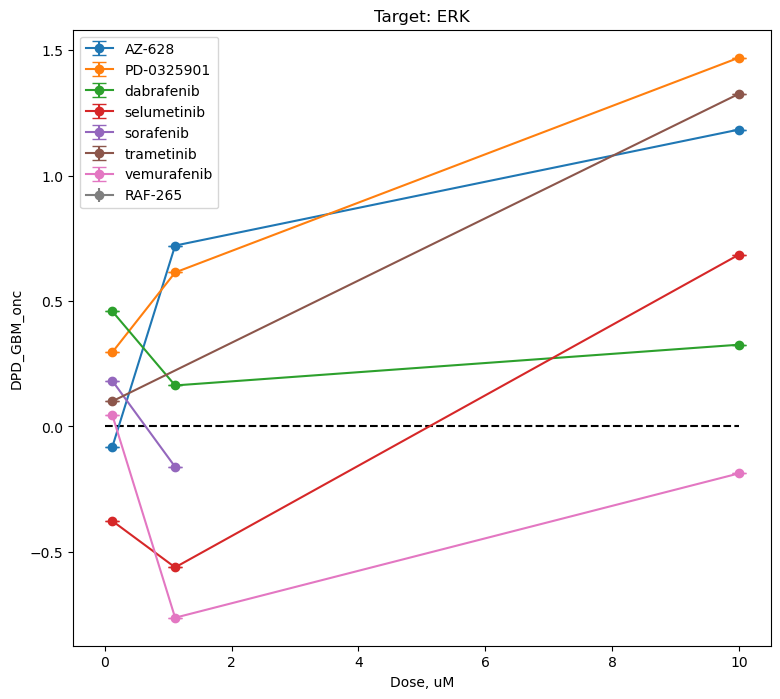

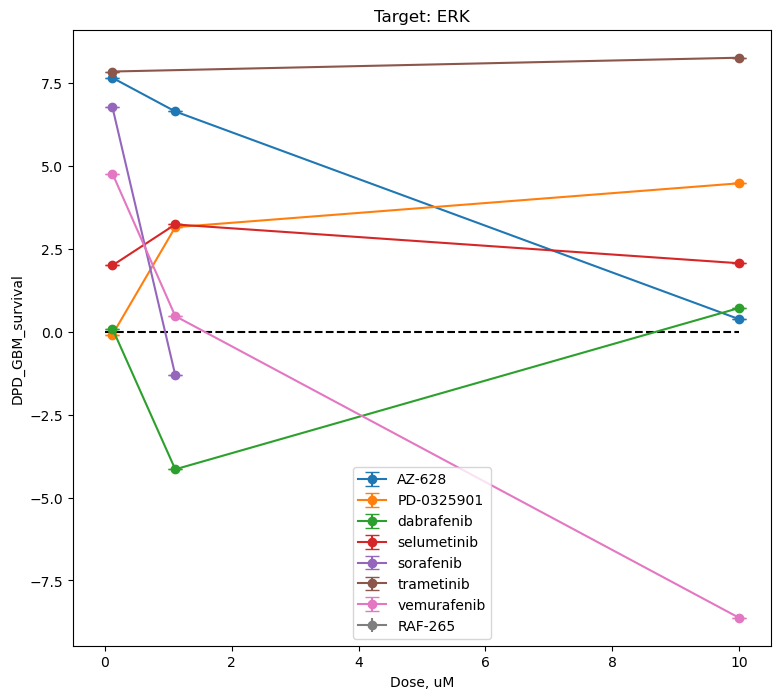

In [33]:
target_name = "ERK"
target_drugs = drugs_list
# deleted SB-203580 (MAPK1)
# select only gene name RAF1, BRAF, MAP2K1, MAP2K2, MAPK1, MAPK3   (Kinase pathway RAF->MEK->ERK) = module "ERK2

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
print_drugs += target_drugs

### EGFR

In [66]:
target = "EGFR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target EGFR: 6 ['afatinib', 'alvocidib', 'erlotinib', 'gefitinib', 'lapatinib', 'vandetanib']


In [112]:
drugs_list = ['afatinib', 'erlotinib', 'gefitinib', 'lapatinib', 'vandetanib']

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
afatinib,"EGFR, ERBB2, ERBB4","0.12 uM, 1.11 uM"
erlotinib,EGFR,"0.12 uM, 1.11 uM, 10 uM"
gefitinib,EGFR,"1.11 uM, 10 uM"
lapatinib,"EGFR, ERBB2","0.12 uM, 1.11 uM, 10 uM"
vandetanib,"EGFR, FLT1, FLT4, KDR, PTK6, RET, TEK","0.12 uM, 1.11 uM, 10 uM"


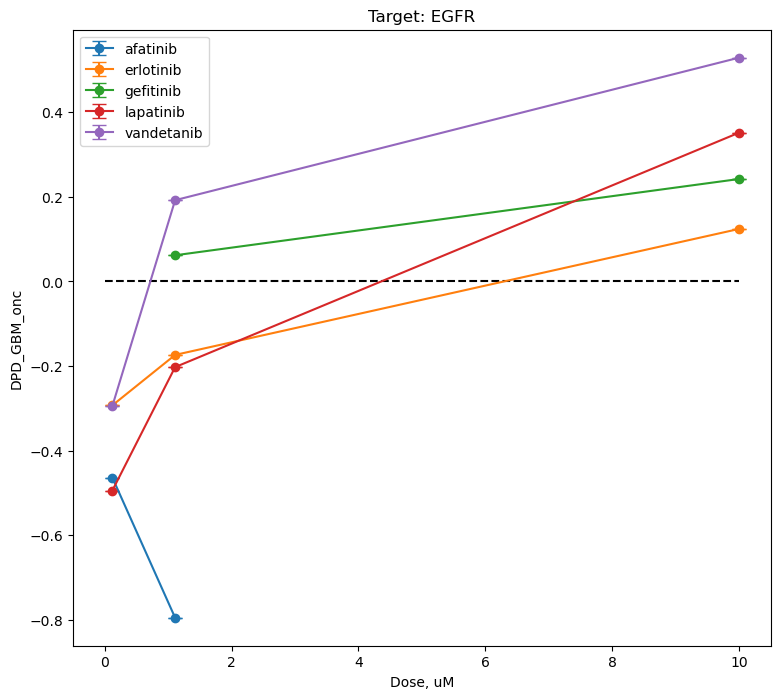

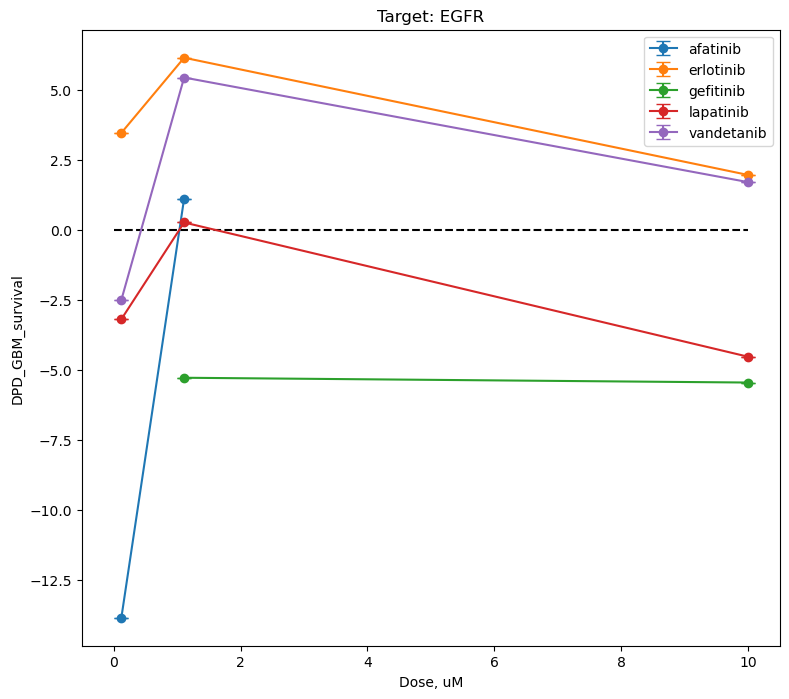

In [113]:
target_name = "EGFR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### JAK-STAT

In [78]:
target = "JAK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target JAK: 1 ['tozasertib']


In [79]:
drugs_list = drugs 

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
tozasertib,"ABL1, AURKA, AURKB, AURKC, BCR, FLT3, JAK2","0.12 uM, 1.11 uM, 10 uM"


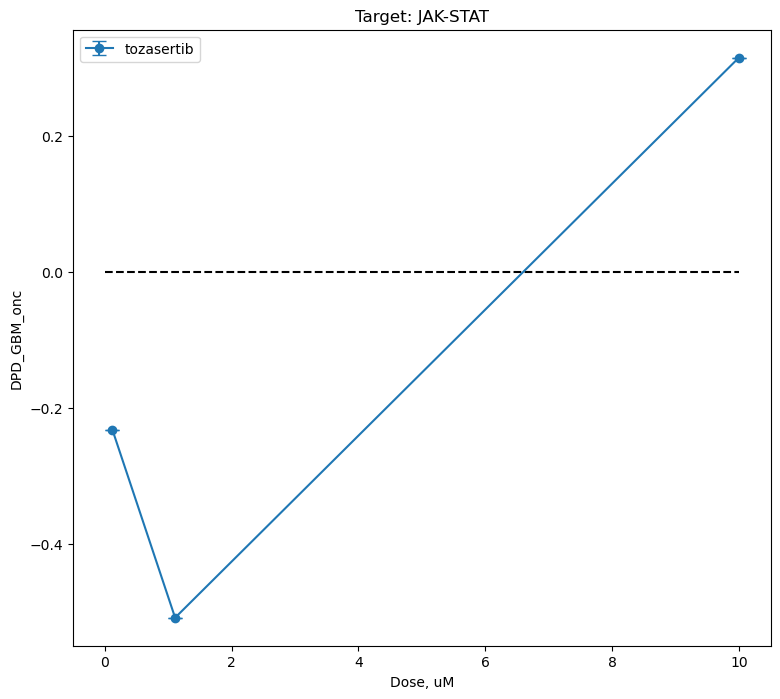

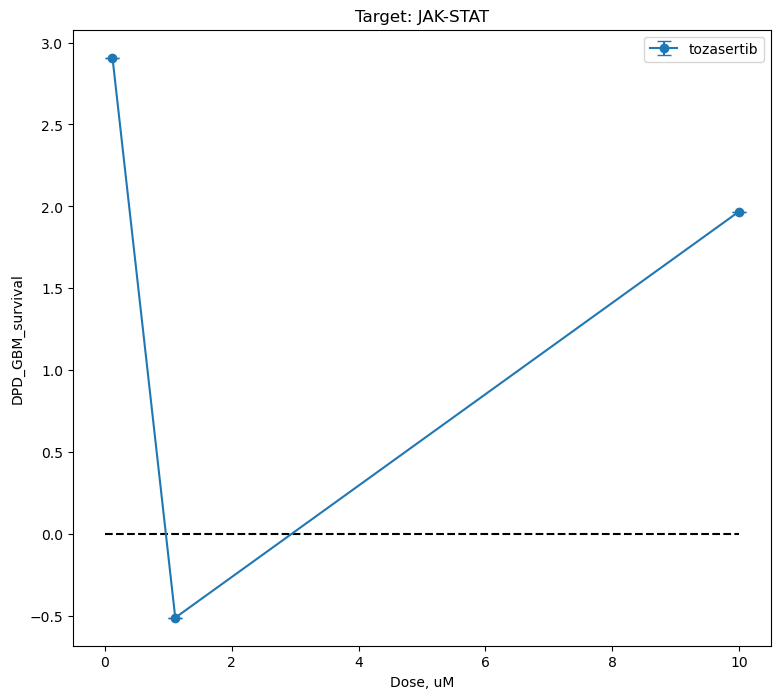

In [80]:
target_name = "JAK-STAT"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### Estrogen

In [70]:
target = "ESR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target ESR: 3 ['dienestrol', 'estradiol-cypionate', 'raloxifene']


In [71]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
dienestrol,ESR1,"0.12 uM, 1.11 uM, 10 uM"
estradiol-cypionate,ESR1,"0.12 uM, 1.11 uM, 10 uM"
raloxifene,"ESR1, ESR2","0.12 uM, 1.11 uM, 10 uM"


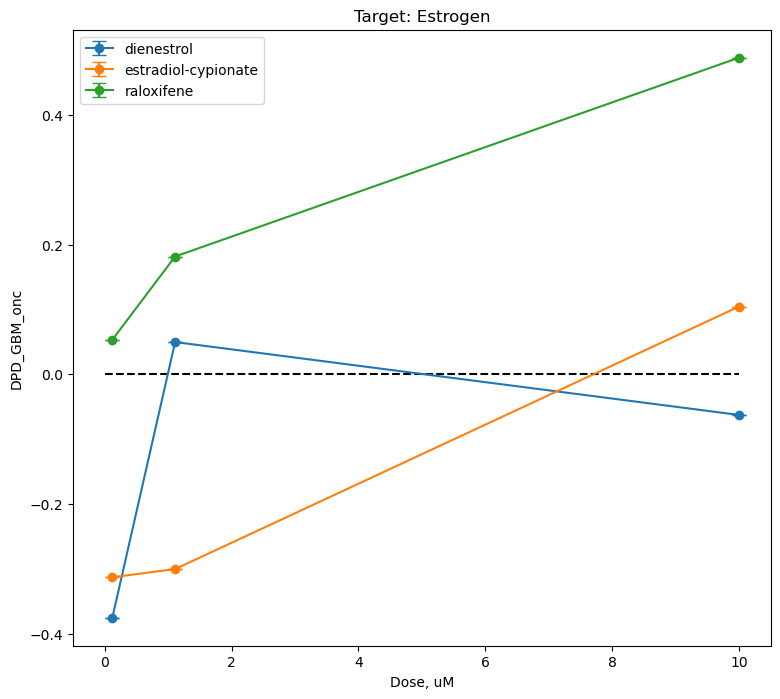

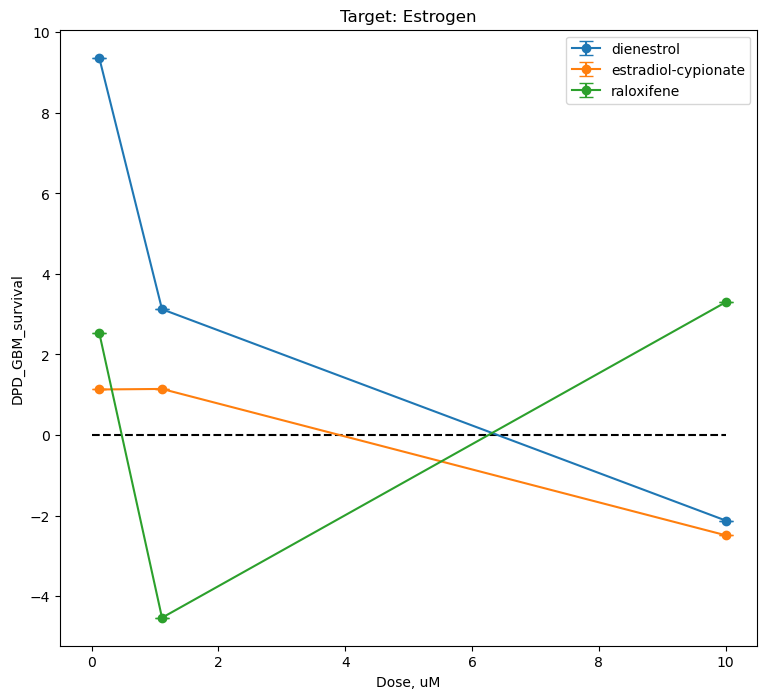

In [72]:
target_name = "Estrogen"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### p53

In [121]:
target = "MDM2"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target MDM2: 6 ['AMG-232', 'HLI-373', 'RITA', 'SAR405838', 'nutlin-3', 'serdemetan']


In [74]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
AMG-232,MDM2,"0.12 uM, 1.11 uM, 10 uM"
HLI-373,MDM2,"1.11 uM, 10 uM, 3.33 uM"
RITA,MDM2,"0.08 uM, 1.11 uM, 10 uM, 3.33 uM"
SAR405838,MDM2,"1.11 uM, 3.33 uM"
nutlin-3,MDM2,"0.12 uM, 1.11 uM, 10 uM, 3.33 uM"
serdemetan,MDM2,"1.11 uM, 10 uM, 3.33 uM"


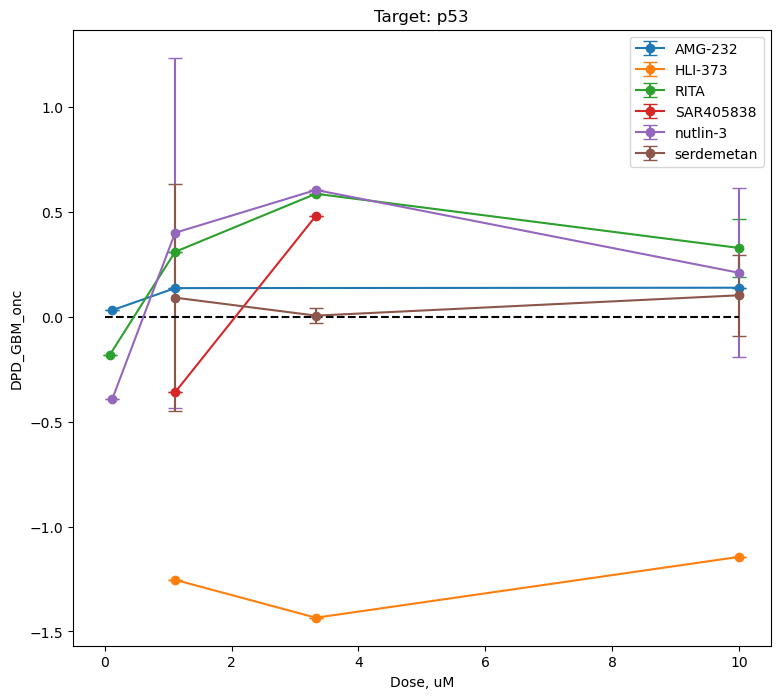

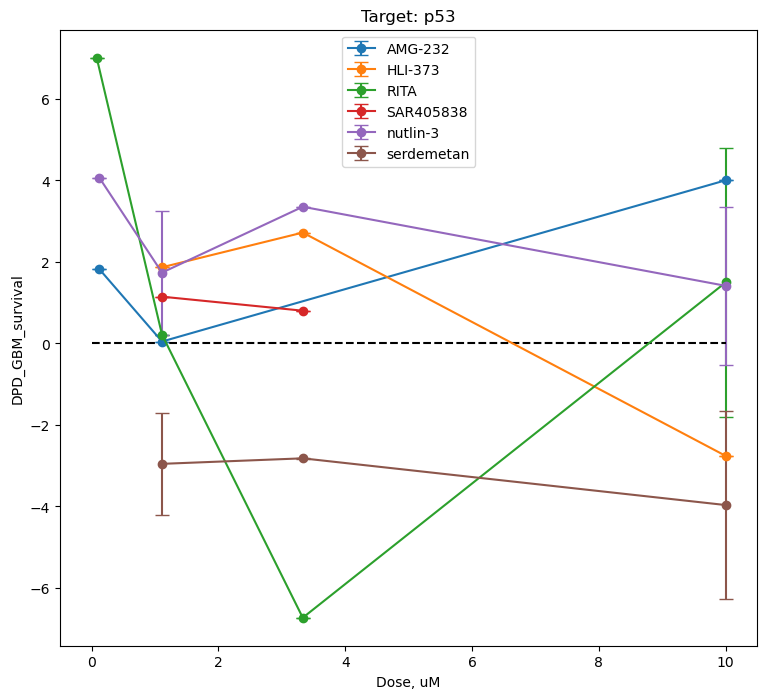

In [75]:
target_name = "p53"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

### Aurora

In [114]:
target = "AURK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target AURK: 3 ['JNJ-7706621', 'barasertib-HQPA', 'tozasertib']


In [35]:
drugs_list = drugs + ["aurora-a-inhibitor-i"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
JNJ-7706621,"AURKA, AURKB, CDK1, CDK2","0.12 uM, 1.11 uM, 10 uM"
barasertib-HQPA,AURKB,"0.12 uM, 1.11 uM, 10 uM"
tozasertib,"ABL1, AURKA, AURKB, AURKC, BCR, FLT3, JAK2","0.12 uM, 1.11 uM, 10 uM"
aurora-a-inhibitor-i,,


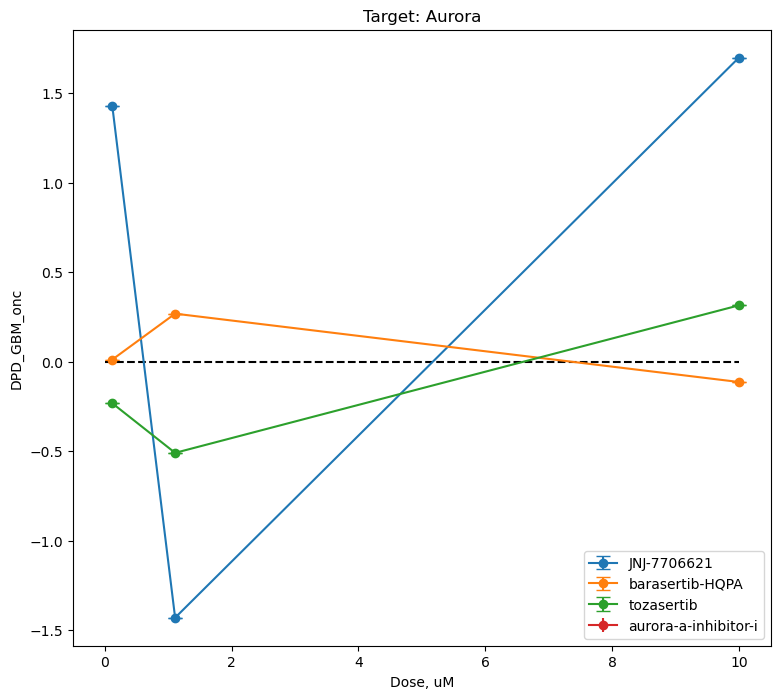

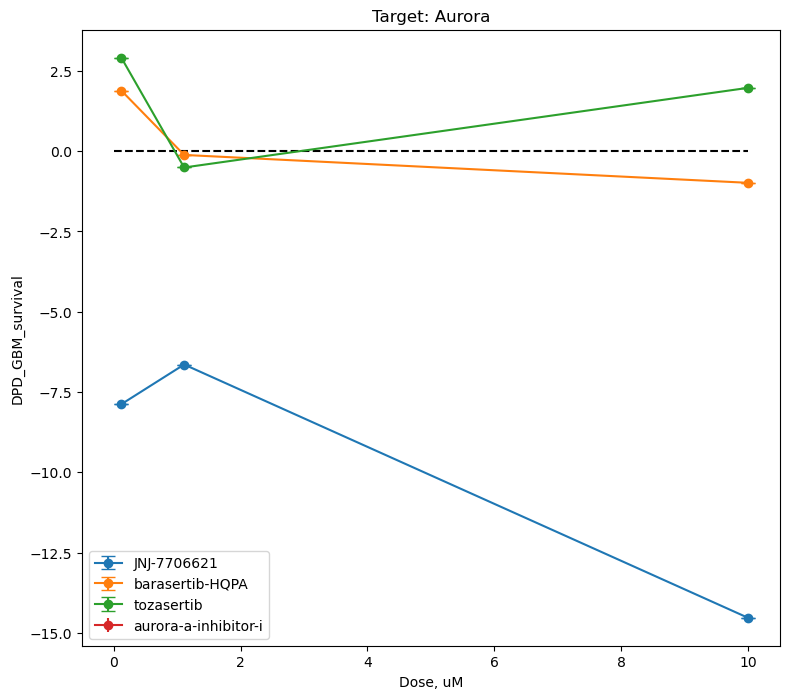

In [36]:
target_name = "Aurora"
target_drugs = drugs_list#["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib", "JWE-035"]
# deleted ENMD-2076, KW-2449, orantinib because other targets 
# deleted aurora-a-inhibitor-i (2017) - not in data 2020

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
# delete JWE-035 bacause no enought info
print_drugs += ["GSK-1070916", "MLN-8054", "ZM-447439", "alisertib"]

### TGFbR

In [124]:
target = "ALK"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target ALK: 3 ['alectinib', 'ceritinib', 'crizotinib']


In [40]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
LDN-193189,"ACVR1, BMPR1A",1.11 uM
LDN-212854,"ABL1, ACVR1, RIPK2",1.11 uM


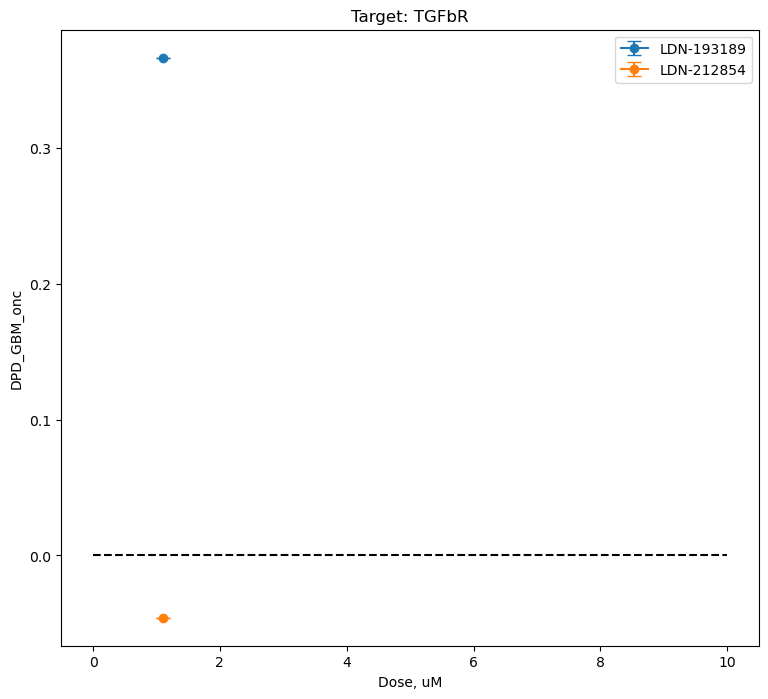

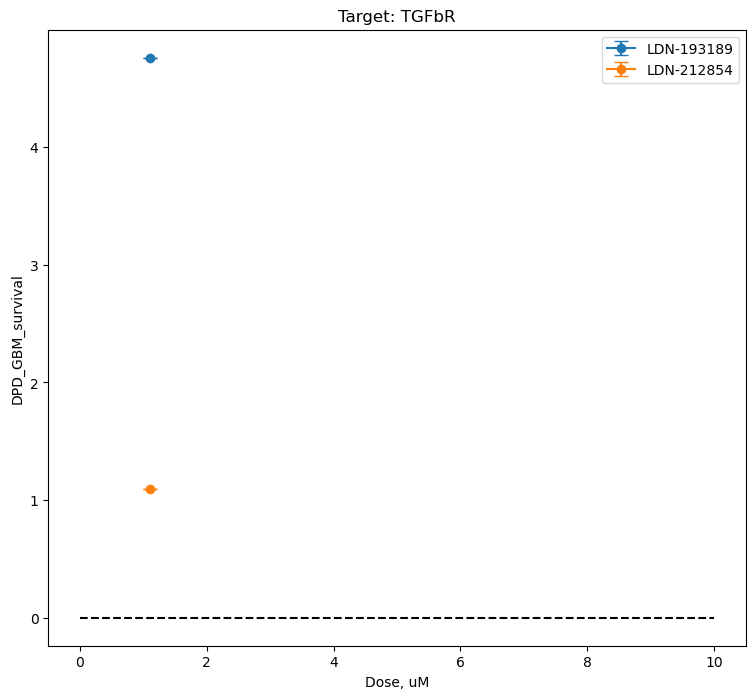

In [42]:
target_name = "TGFbR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

In [ ]:
print_drugs += target_drugs

### FGFR

In [120]:
target = "EGFR"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target VEG: 0 []


In [119]:
drugs_list = drugs#"rebastinib", "lenvatinib", "orantinib", "foretinib", "cediranib", "sunitinib", "tivozanib"]

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
afatinib,"EGFR, ERBB2, ERBB4","0.12 uM, 1.11 uM"
alvocidib,"CDK1, CDK2, CDK4, CDK5, CDK6, CDK7, CDK8, CDK9...","0.12 uM, 1.11 uM, 10 uM"
erlotinib,EGFR,"0.12 uM, 1.11 uM, 10 uM"
gefitinib,EGFR,"1.11 uM, 10 uM"
lapatinib,"EGFR, ERBB2","0.12 uM, 1.11 uM, 10 uM"
vandetanib,"EGFR, FLT1, FLT4, KDR, PTK6, RET, TEK","0.12 uM, 1.11 uM, 10 uM"


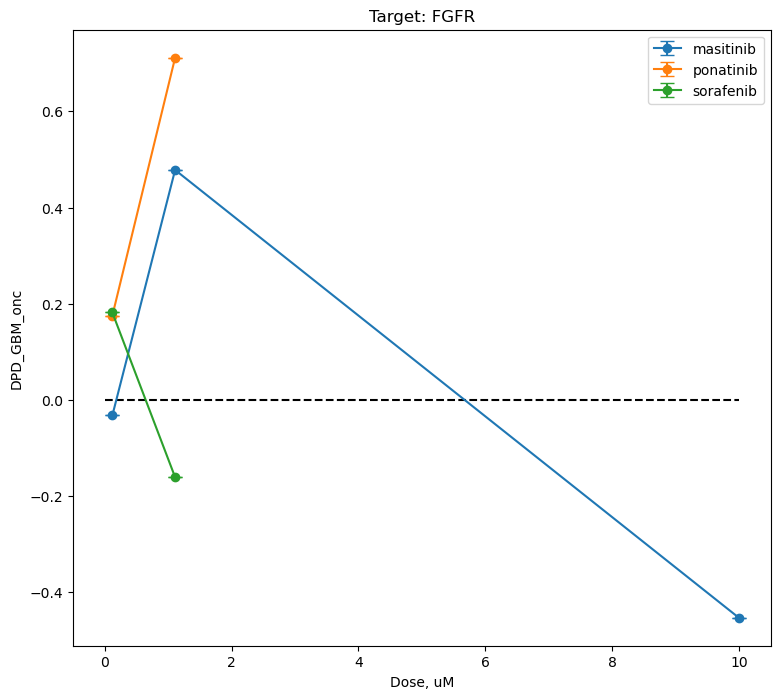

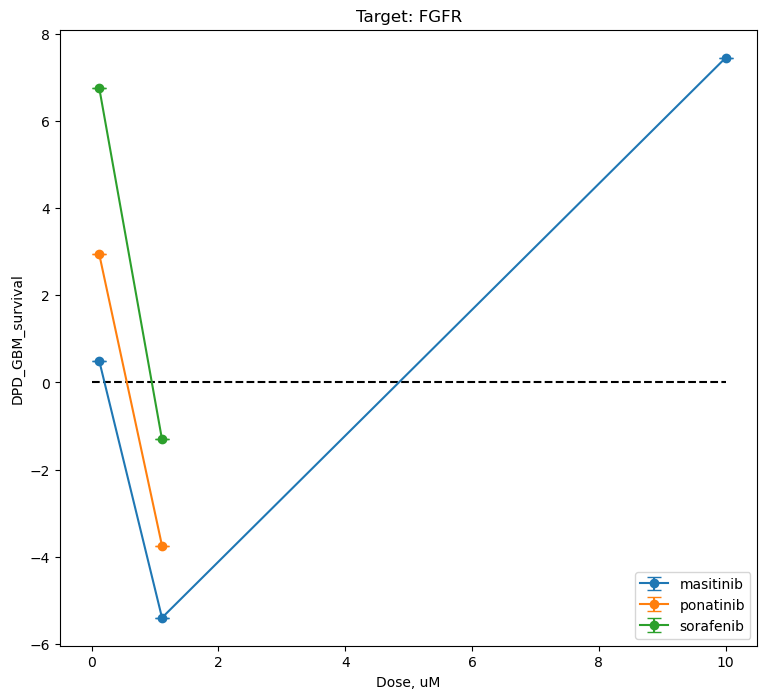

In [98]:
target_name = "FGFR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)
    plt.show()

### PDGFR

In [102]:
target = "PDGF"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PDGF: 5 ['dasatinib', 'imatinib', 'masitinib', 'sorafenib', 'tandutinib']


In [103]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
dasatinib,"ABL1, BCR, EPHA2, FYN, KIT, LCK, LYN, PDGFRB, ...","0.12 uM, 1.11 uM, 10 uM"
imatinib,"ABL1, BCR, CSF1R, KIT, PDGFRA, PDGFRB","0.12 uM, 1.11 uM, 10 uM"
masitinib,"FGFR3, KIT, LYN, PDGFRA, PDGFRB","0.12 uM, 1.11 uM, 10 uM"
sorafenib,"BRAF, DDR2, FGFR1, FLT1, FLT3, FLT4, KDR, KIT,...","0.12 uM, 1.11 uM"
tandutinib,"FLT3, KIT, PDGFRA, PDGFRB","0.08 uM, 1.11 uM, 10 uM"


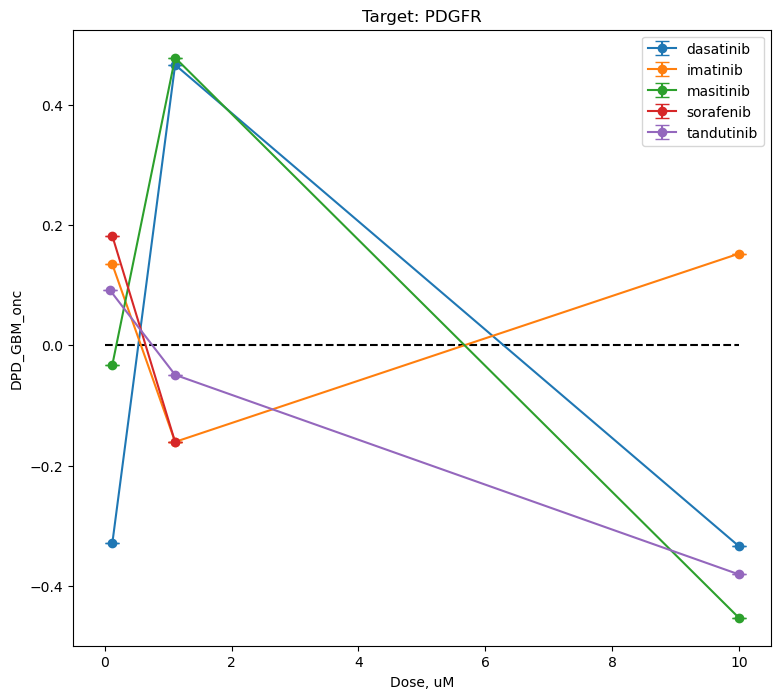

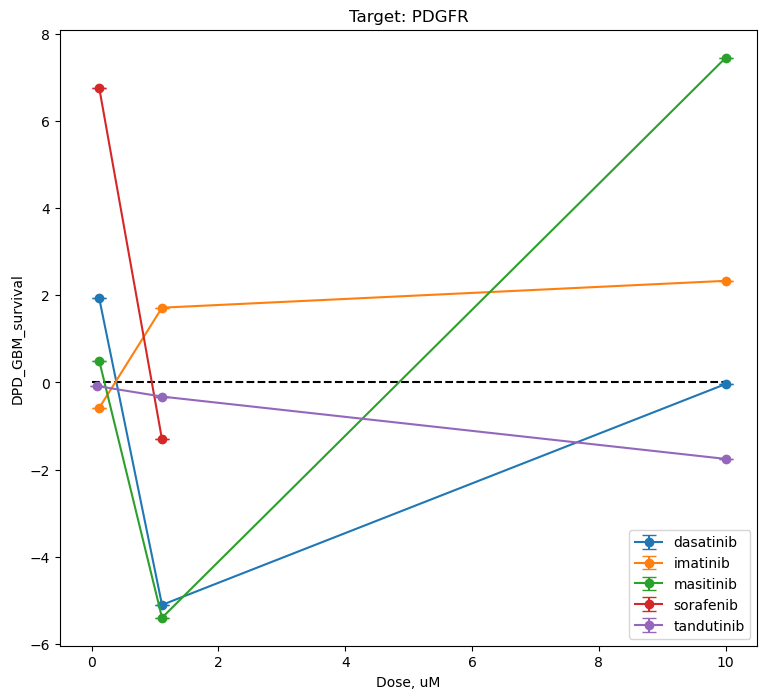

In [104]:
target_name = "PDGFR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [ ]:
print_drugs += target_drugs

### MET

In [107]:
target = "MET"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target MET: 3 ['EMD-1214063', 'cabozantinib', 'crizotinib']


In [108]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
EMD-1214063,MET,"1.11 uM, 10 uM, 3.33 uM"
cabozantinib,"FLT3, KDR, KIT, MET, RET, TEK","0.12 uM, 1.11 uM, 10 uM"
crizotinib,"ALK, MET","0.08 uM, 1.11 uM, 10 uM"


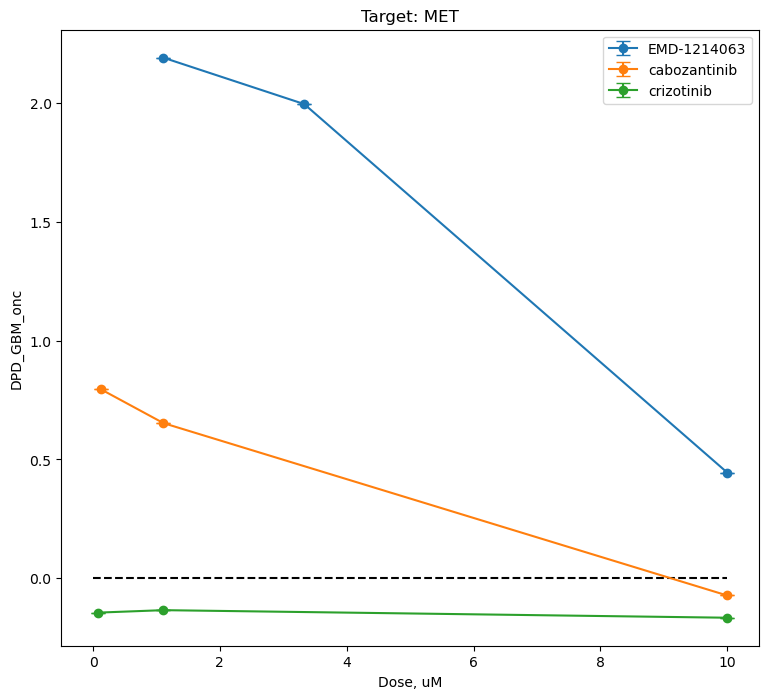

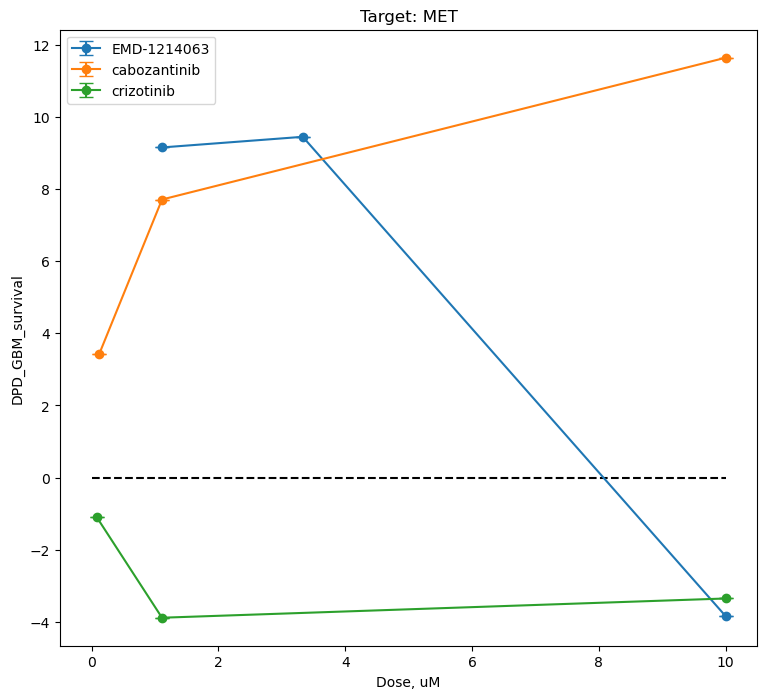

In [109]:
target_name = "MET"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [ ]:
# delete module "PTGS"

### PSMB

In [47]:
target = "PSMB"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PSMB: 2 ['MG-132', 'ixazomib']


In [48]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
MG-132,PSMB1,"0.12 uM, 1.11 uM"
ixazomib,PSMB1,"0.12 uM, 1.11 uM, 10 uM"


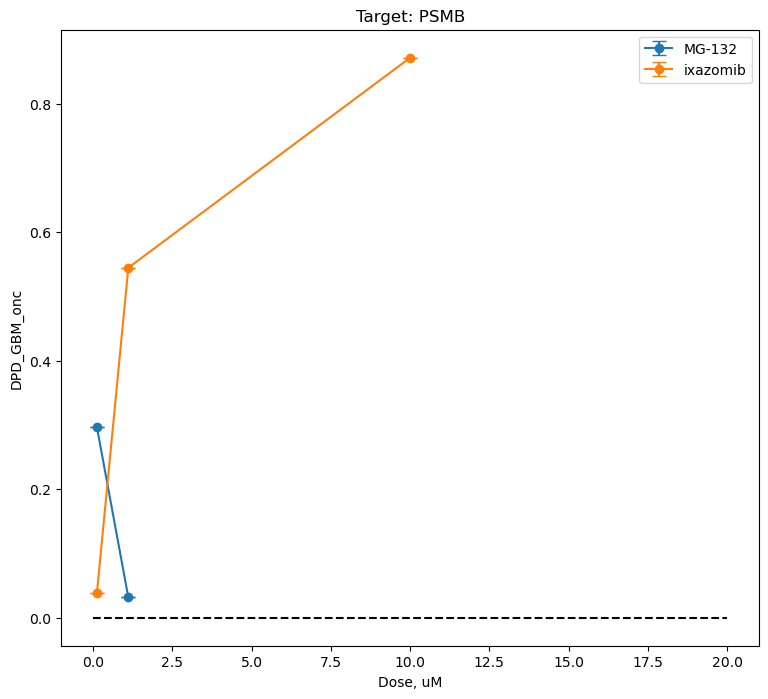

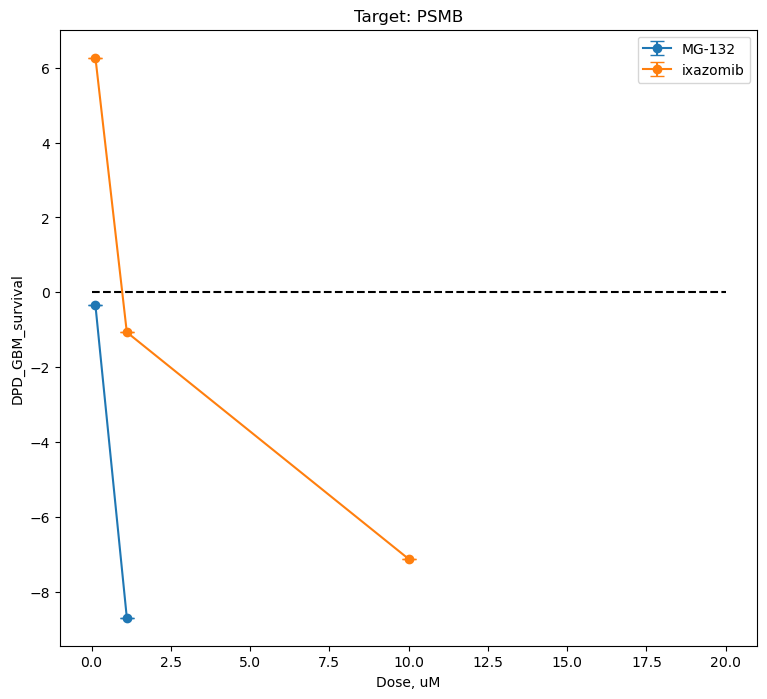

In [49]:
target_name = "PSMB"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,20], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [ ]:
print_drugs += target_drugs

### GPBAR

In [111]:
target = "BET"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target BET: 0 []


In [ ]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
betulinic-acid,GPBAR1,"0.01 uM, 0.03 uM, 0.04 uM, 0.08 uM, 0.125 uM, ..."


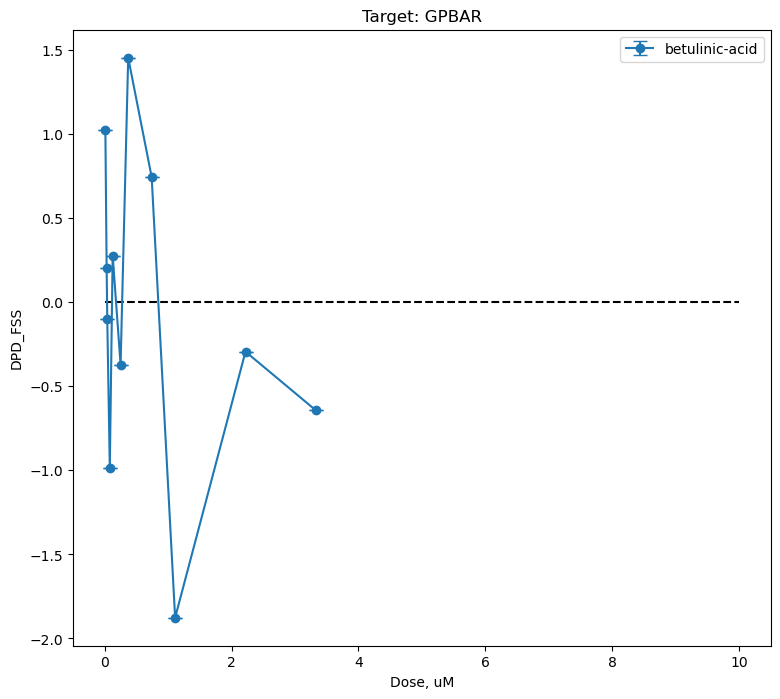

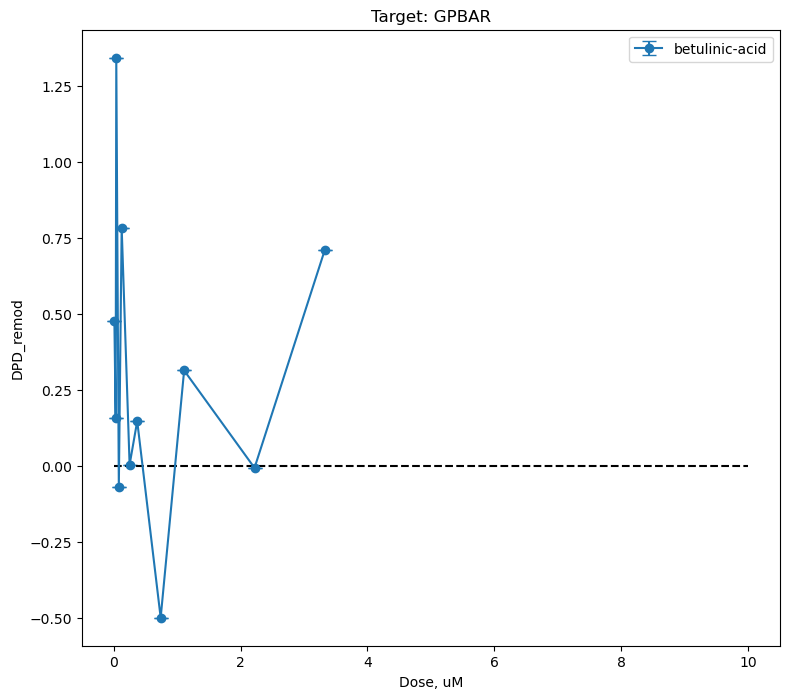

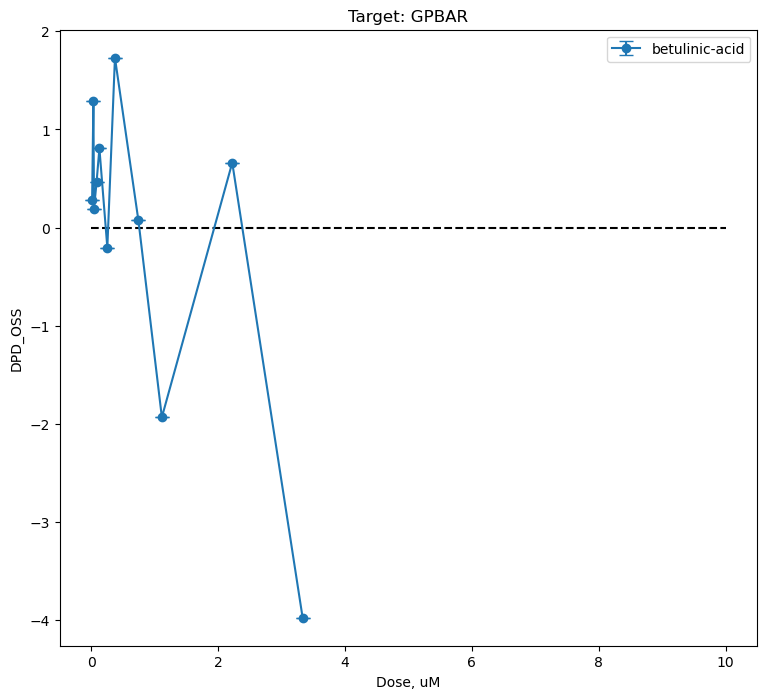

In [ ]:
target_name = "GPBAR"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [ ]:
# delete module "GPBAR"

### PPARG

In [51]:
target = "PPARG"
drugs = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.targets.str.contains(target)].pert_drug)))

print("drugs for target " + target + ":" , len(drugs), drugs)

drugs for target PPARG: 1 ['troglitazone']


In [52]:
drugs_list = drugs

targets = []
doses = []

for drug in drugs_list:
    targets.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].targets)))))
    doses.append(", ".join(sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose)))))
    
target_drugs_df = pd.DataFrame(list(zip(targets, doses)), index = drugs_list, columns = ["targets","doses"])

display(target_drugs_df)

,targets,doses
troglitazone,PPARG,"0.12 uM, 1.11 uM, 10 uM"


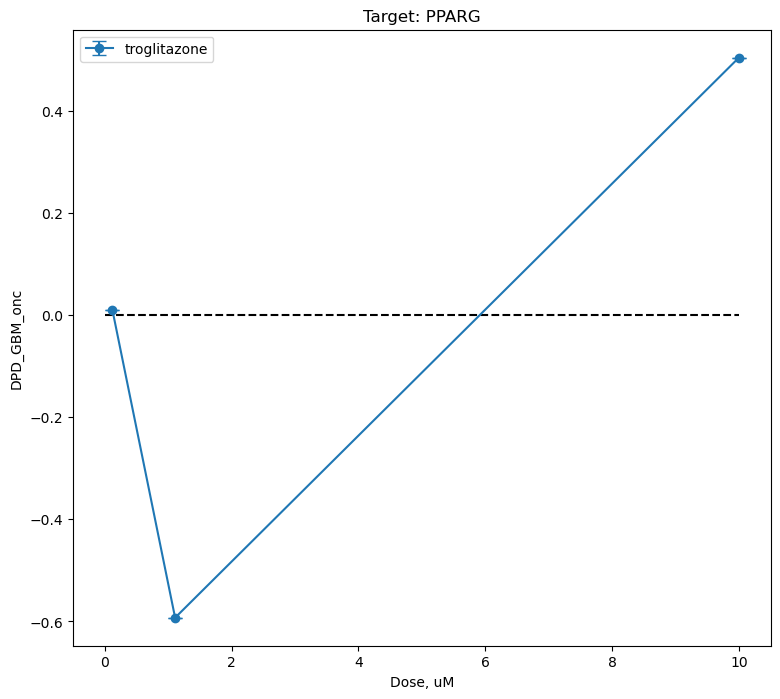

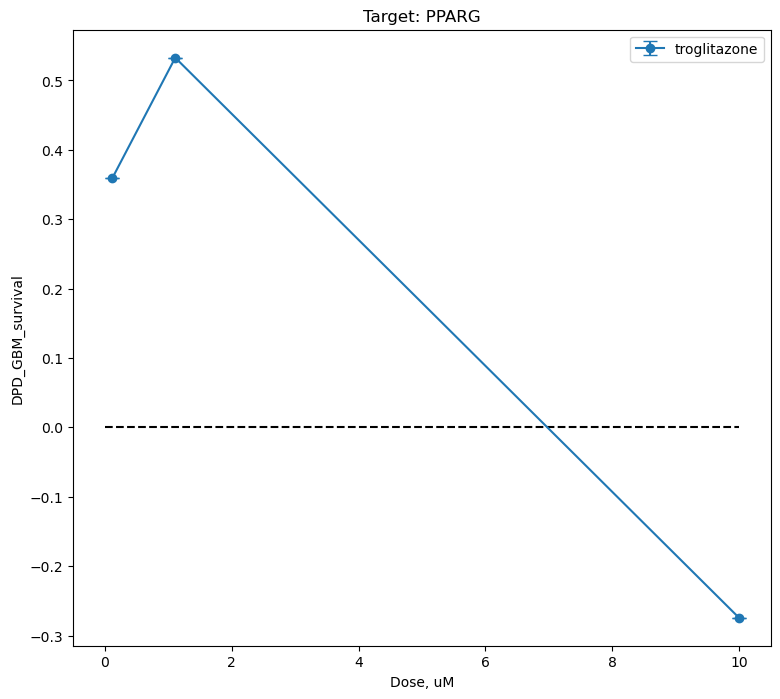

In [53]:
target_name = "PPARG"
target_drugs = drugs_list

for DPD_val in states:
    plt.figure(figsize = (9,8))
    for drug in target_drugs:
        doses = sorted(list(set(sig_info_cell_df.loc[sig_info_cell_df.pert_drug == drug].dose_float)))
        DPDs = []
        DPD_errs = []
        for dose in doses:
            labels = sig_info_cell_df.loc[(sig_info_cell_df.pert_drug == drug) & (sig_info_cell_df.dose_float == dose)].index
            DPDs.append(statistics.mean(DPD_df.loc[labels, DPD_val]))
            if (len(labels) > 1):
                DPD_errs.append(scipy.stats.sem(DPD_df.loc[labels, DPD_val]))
            else:
                DPD_errs.append(0)
        plt.errorbar(doses, DPDs, yerr = DPD_errs, fmt = "o-", label = drug, capsize = 5)
    plt.legend()
    plt.plot([0,10], [0,0], "--", color = "black")
    plt.xlabel("Dose, uM")
    plt.ylabel("DPD_" + DPD_val)
    plt.title("Target: " + target_name)
    #plt.savefig(os.path.join(out_dir, target_name + "_DPD_" + DPD_val + ".png"), dpi = 300)

In [ ]:
# delete module "PPARG"

In [ ]:
print(print_drugs)

print_drugs_df = pd.DataFrame(print_drugs)
display(print_drugs_df)

print_drugs_df.to_excel("drugs.xlsx")

['CGP-60474', 'dinaciclib', 'PHA-767491', 'roscovitine', 'PF-03758309', 'PF-04691502', 'XL-147', 'GSK-2334470', 'A-66', 'BGT-226', 'BX-795', 'AZ-628', 'FR-180204', 'GDC-0879', 'GW-5074', 'PD-0325901', 'PD-184352', 'TAK-733', 'dabrafenib', 'refametinib', 'RAF-265', 'I-BET-762', 'I-BET-151', 'JQ-1-R', 'PFI-1', 'GSK-1070916', 'MLN-8054', 'ZM-447439', 'alisertib', 'SB-525334', 'rebastinib', 'lenvatinib', 'orantinib', 'foretinib', 'cediranib', 'sunitinib', 'tivozanib', 'enzastaurin', 'MG-132', 'bortezomib', 'ixazomib']


,0
0,CGP-60474
1,dinaciclib
2,PHA-767491
3,roscovitine
4,PF-03758309
5,PF-04691502
6,XL-147
7,GSK-2334470
8,A-66
9,BGT-226
